DATA ANALYSIS

***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load data

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VVNM/data_cleaning.csv', header=0, sep = ',') 
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cleaning.csv', header=0, sep = ',')

# Remove "Unnamed: 0" column
data = data.drop(["Unnamed: 0"], axis = 1)
data.shape
data

,USER_KEY,USER_NAME,USER_AGE,USER_SEX,VIEW_DATE,ASSET_TYPE,ASSET_CATEGORY,SRC_GENRE_DESC,CHANNEL,ASSET_NAME,PRG_DURATION_MIN,VIEW_DURATION_MIN,VIEWERSHIP_KEY,ASSET_KEY,VIEW_RATING
0,489647,A98815,73,F,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,ΕΡΤ1,Super League SOUROTI 2018/19 (L)(PANAITOLIKOS ...,115,"17,5",8769,6548,1
1,489647,A98815,73,F,10/12/18 00:00:00,TSTV,SPORTS,SPORTS-LIVE,"Eurosport 1 (International, GREEK)",Sports show (ALL SPORTS: WATTS ),15,"12,83",8770,7633,4
2,490873,babil,30,F,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,novasports1 HD,Greek Football Championship 2018/19 (L)(PANION...,130,"23,27",8771,7634,1
3,488305,9anti1,29,M,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,novasports1 HD,Greek Football Championship 2018/19 (L)(PANION...,130,"73,95",8772,7634,3
4,488844,askiriazis,81,M,10/12/18 00:00:00,VOD,MOVIES,COMEDY,UNKNOWN,HALL PASS,"72,891","56,07",8773,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697174,1928862,OTT_12CGUWBK,79,M,09/12/18 00:00:00,VOD,MOVIES,HORROR,UNKNOWN,AMITYVILLE: THE AWAKENING,"118,209","90,93",1705943,3284,4
1697175,1987631,OTT_14DP195L,85,M,09/12/18 00:00:00,VOD,MOVIES,"ADVENTURE,FANTASY",UNKNOWN,WRATH OF THE TITANS,"34,151","26,27",1705944,2230,4
1697176,1931523,OTT_12C7W8Z3,23,F,09/12/18 00:00:00,VOD,KIDS,KIDS,UNKNOWN,THE BIG BAD FOX AND OTHER TALES (GREEK DUBBED),"6,175","4,75",1705945,12,4
1697177,1931831,OTT_12GAYWKX,25,F,09/12/18 00:00:00,VOD,CHRISTMAS TIME,"COMEDY,FAMILY",UNKNOWN,HOME ALONE,"263,77","202,9",1705946,4394,4


In [4]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in data['SRC_GENRE_DESC']:
        words = genre.split(',')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [5]:
genres

{'ACTION': 179184,
 'ADVENTURE': 41629,
 'ANIMATION': 88126,
 'COMEDY': 194529,
 'COMEDY DRAMA': 21332,
 'COOKING': 4315,
 'CRIME': 153617,
 'DOCUMENTARY': 28315,
 'DRAMA': 105440,
 'FAMILY': 76414,
 'FANTASY': 24379,
 'HISTORY': 8711,
 'HORROR': 51922,
 'KIDS': 288522,
 'LIVE ACTION': 25981,
 'MEDICAL DRAMA': 8013,
 'MUSICAL': 1076,
 'MYSTERY': 54067,
 'REALITY SHOW': 23820,
 'ROMANCE': 21962,
 'ROMANTIC COMEDY': 55733,
 'SCIFI': 38030,
 'SHOW': 35298,
 'SOCIAL': 41262,
 'SPORT': 6858,
 'SPORTS-LIVE': 200892,
 'TALENT SHOW': 11225,
 'THRILLER': 144595,
 'TRUE STORY': 60926,
 'UNKNOWN': 104264,
 'WAR': 11207,
 'WESTERN': 3080}

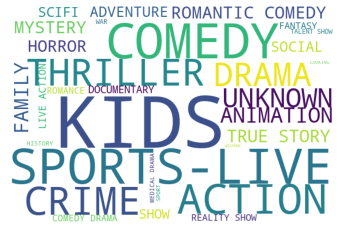

In [6]:
# Create a WordCloud 
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=400, background_color = 'white', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [7]:
# Find most common 100 - head 50

common_movies = data.copy()
common_movies = common_movies.loc[data['ASSET_CATEGORY'] == 'MOVIES']

In [8]:
#Convert PRG_DURATION_MIN , VIEW_DURATION_MIN columns  from object to float type
data["PRG_DURATION_MIN"]=data["PRG_DURATION_MIN"].str.replace(',','.')
data["VIEW_DURATION_MIN"]=data["VIEW_DURATION_MIN"].str.replace(',','.')
data['VIEW_DURATION_MIN'] = data['VIEW_DURATION_MIN'].astype(float)
data['PRG_DURATION_MIN'] = data['PRG_DURATION_MIN'].astype(float)

# Check the data types
data.dtypes

USER_KEY               int64
USER_NAME             object
USER_AGE               int64
USER_SEX              object
VIEW_DATE             object
ASSET_TYPE            object
ASSET_CATEGORY        object
SRC_GENRE_DESC        object
CHANNEL               object
ASSET_NAME            object
PRG_DURATION_MIN     float64
VIEW_DURATION_MIN    float64
VIEWERSHIP_KEY         int64
ASSET_KEY              int64
VIEW_RATING            int64
dtype: object

In [9]:
# pip install pandas_profiling 

In [10]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [11]:
# Pandas profiling report
# pp.ProfileReport(data)

In [12]:
# Show the names of the columns
data.columns

Index(['USER_KEY', 'USER_NAME', 'USER_AGE', 'USER_SEX', 'VIEW_DATE',
       'ASSET_TYPE', 'ASSET_CATEGORY', 'SRC_GENRE_DESC', 'CHANNEL',
       'ASSET_NAME', 'PRG_DURATION_MIN', 'VIEW_DURATION_MIN', 'VIEWERSHIP_KEY',
       'ASSET_KEY', 'VIEW_RATING'],
      dtype='object')

In [13]:
# Create new variable 'VIEW_PERCENTAGE'
data["VIEW_PERCENTAGE"] = data["VIEW_DURATION_MIN"] / data["PRG_DURATION_MIN"] 

In [14]:
# Create a copy of the original df to extract the columns 
data_extract = data.copy()

# Create new data sets based on the type of columns
numerical_data = data_extract[['USER_AGE','PRG_DURATION_MIN','VIEW_DURATION_MIN',"VIEW_PERCENTAGE"]]
ordinal_data = data_extract[["VIEW_RATING"]]
categorical_data = data_extract[['USER_SEX','ASSET_TYPE','ASSET_CATEGORY','SRC_GENRE_DESC','CHANNEL']]

In [15]:
#################################################################
#~~~~~~~~~~~~~~~~~~~~~ Univariate Analysis~~~~~~~~~~~~~~~~~~~~~ #
#################################################################

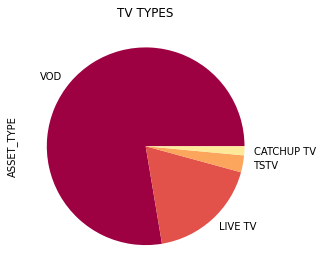

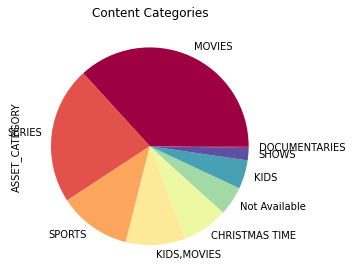

In [16]:
%matplotlib inline
#specify the figure details
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)

#specify the color map information
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

#plot the pie chart
plt.subplot(the_grid[0, 1], aspect=1, title='TV TYPES')

#plt.pie(categorical_data.ASSET_CATEGORY ,  colors=colors)
categorical_data.ASSET_TYPE.value_counts(normalize=True).plot.pie(colors=colors)
plt.show()

#specify the figure details
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)

#specify the color map information
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Content Categories')
#plot the pie chart of education categories
categorical_data.ASSET_CATEGORY.value_counts(normalize=True).plot.pie(colors=colors)
plt.show()

In [17]:
numerical_data.USER_AGE.describe()

count    1.697179e+06
mean     5.696690e+01
std      2.220954e+01
min      1.900000e+01
25%      3.800000e+01
50%      5.700000e+01
75%      7.600000e+01
max      9.500000e+01
Name: USER_AGE, dtype: float64

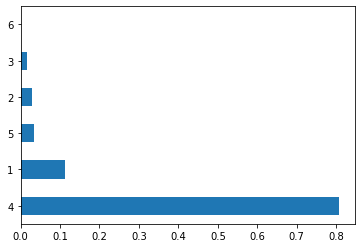

In [18]:
#plot the pie chart of education categories
ordinal_data.VIEW_RATING.value_counts(normalize=True).plot.barh()
plt.show()

In [19]:
#################################################################
#~~~~~~~~~~~~~~~~~~~~~ Bivariate Analysis~~~~~~~~~~~~~~~~~~~~~ #
#################################################################

In [20]:
# correlation matrix 

data_extract.corr()

,USER_KEY,USER_AGE,PRG_DURATION_MIN,VIEW_DURATION_MIN,VIEWERSHIP_KEY,ASSET_KEY,VIEW_RATING,VIEW_PERCENTAGE
USER_KEY,1.000000,0.003192,-0.034573,0.047938,-0.004092,0.020226,0.144363,0.138135
USER_AGE,0.003192,1.000000,-0.005347,-0.000337,-0.001547,-0.003512,0.006535,0.005898
PRG_DURATION_MIN,-0.034573,-0.005347,1.000000,0.601212,0.003969,-0.052099,-0.254431,-0.273714
VIEW_DURATION_MIN,0.047938,-0.000337,0.601212,1.000000,0.003303,0.017084,0.327114,0.334583
VIEWERSHIP_KEY,-0.004092,-0.001547,0.003969,0.003303,1.000000,0.011179,-0.006175,-0.005365
ASSET_KEY,0.020226,-0.003512,-0.052099,0.017084,0.011179,1.000000,0.004587,0.007388
VIEW_RATING,0.144363,0.006535,-0.254431,0.327114,-0.006175,0.004587,1.000000,0.988232
VIEW_PERCENTAGE,0.138135,0.005898,-0.273714,0.334583,-0.005365,0.007388,0.988232,1.000000


In [21]:
#pip install plotly

In [22]:
# correlation matrix with plotly

def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }

import plotly.graph_objects as go

data_corr = data_extract.corr()
fig_data_corr = go.Figure(data=go.Heatmap(df_to_plotly(data_corr)))
fig_data_corr.show()

In [23]:
# Unique users 

print("Total Users are:", data["USER_NAME"].nunique())
print("Male Users are:", data["USER_NAME"][data["USER_SEX"] == "F"].nunique())
print("Female Users are:",data["USER_NAME"].nunique() - data["USER_NAME"][data["USER_SEX"] == "F"].nunique())

Total Users are: 102537
Male Users are: 51308
Female Users are: 51229


In [24]:
# group by USER_SEX and USER_AGE

data_grouped = data_extract.groupby("USER_KEY").agg({"USER_SEX":lambda x: set(x).pop(),"USER_AGE":lambda x: set(x).pop()})

data_grouped["USER_SEX"].value_counts()

F    51308
M    51229
Name: USER_SEX, dtype: int64

In [25]:
#pip install chart-studio

In [26]:
# Visualization USER_SEX 
user_sex_count = data_grouped['USER_SEX'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(user_sex_count)),labels=user_sex_count.index)
layout = go.Layout(title= "USER SEX")
sex_data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [27]:
import plotly.express as px

fig = px.box(data_grouped, x='USER_SEX', y='USER_AGE')
fig.update_traces(marker_color="midnightblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='User Age and User Sex')
fig.show()

In [28]:
# What are the top categories ? 

# col = "listed_in"
categories = ", ".join(data_extract['SRC_GENRE_DESC']).split(", ")
counter_list = Counter(categories).most_common(10)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

plot_data = [trace1]
layout = go.Layout(title="Top Genre Categories", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(plot_data, layout=layout)
fig.show()